In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Set random seed for TensorFlow
tf.random.set_seed(42)
np.random.seed(42)


In [2]:
# Read data

data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include='number').columns

# Convert numeric columns int64, float64 to float32
data[numeric_cols] = data[numeric_cols].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float32
 1   CustomerId       10000 non-null  float32
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float32
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float32
 7   Tenure           10000 non-null  float32
 8   Balance          10000 non-null  float32
 9   NumOfProducts    10000 non-null  float32
 10  HasCrCard        10000 non-null  float32
 11  IsActiveMember   10000 non-null  float32
 12  EstimatedSalary  10000 non-null  float32
 13  Exited           10000 non-null  float32
dtypes: float32(11), object(3)
memory usage: 664.2+ KB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.500000,1.569094e+07,650.528809,38.921799,5.012800,76485.890625,1.530200,0.70550,0.515100,100090.234375,0.203700
std,2886.895752,7.193619e+04,96.653297,10.487806,2.892174,62397.406250,0.581654,0.45584,0.499797,57510.492188,0.402769
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.750000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.109375,0.000000
50%,5000.500000,1.569074e+07,652.000000,37.000000,5.000000,97198.539062,1.000000,1.00000,1.000000,100193.914062,0.000000
75%,7500.250000,1.575323e+07,718.000000,44.000000,7.000000,127644.238281,2.000000,1.00000,1.000000,149388.253906,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.093750,4.000000,1.00000,1.000000,199992.484375,1.000000


In [6]:
data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
X = data.iloc[ : , 3:-1].values
X

array([[619.0, 'France', 'Female', ..., 1.0, 1.0, 101348.8828125],
       [608.0, 'Spain', 'Female', ..., 0.0, 1.0, 112542.578125],
       [502.0, 'France', 'Female', ..., 1.0, 0.0, 113931.5703125],
       ...,
       [709.0, 'France', 'Female', ..., 0.0, 1.0, 42085.578125],
       [772.0, 'Germany', 'Male', ..., 1.0, 0.0, 92888.5234375],
       [792.0, 'France', 'Female', ..., 1.0, 0.0, 38190.78125]],
      dtype=object)

In [8]:
y = data.iloc[: , -1].values
y = y.reshape(len(y),1)
y

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [9]:
le = LabelEncoder()

X[:, 2] = le.fit_transform(X[:, 2])

In [10]:
from sklearn.compose import ColumnTransformer

transformer = [('enco_country', OneHotEncoder(), [1])]

ct = ColumnTransformer(transformers = transformer, remainder = 'passthrough')

X_encoded = ct.fit_transform(X)

X_encoded

array([[1.0, 0.0, 0.0, ..., 1.0, 1.0, 101348.8828125],
       [0.0, 0.0, 1.0, ..., 0.0, 1.0, 112542.578125],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 113931.5703125],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 42085.578125],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 92888.5234375],
       [1.0, 0.0, 0.0, ..., 1.0, 0.0, 38190.78125]], dtype=object)

In [11]:
X_train0, X_test, y_train0, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [12]:
# Apply SMOTE to balance the classes

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train0, y_train0)

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [13]:
sc = StandardScaler()

X_train_scale = sc.fit_transform(X_train)
X_val_scale = sc.transform(X_val)
X_test_scale = sc.transform(X_test)


In [14]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = ann.fit(X_train_scale, y_train, batch_size=50, epochs=100, validation_data=(X_val_scale,y_val))

Epoch 1/100
191/191 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6136 - val_loss: 0.6110 - val_accuracy: 0.6797
Epoch 2/100
191/191 [==============================] - 0s 595us/step - loss: 0.6047 - accuracy: 0.6757 - val_loss: 0.5775 - val_accuracy: 0.6982
Epoch 3/100
191/191 [==============================] - 0s 597us/step - loss: 0.5807 - accuracy: 0.7003 - val_loss: 0.5537 - val_accuracy: 0.7162
Epoch 4/100
191/191 [==============================] - 0s 578us/step - loss: 0.5645 - accuracy: 0.7162 - val_loss: 0.5389 - val_accuracy: 0.7360
Epoch 5/100
191/191 [==============================] - 0s 594us/step - loss: 0.5533 - accuracy: 0.7267 - val_loss: 0.5292 - val_accuracy: 0.7379
Epoch 6/100
191/191 [==============================] - 0s 592us/step - loss: 0.5450 - accuracy: 0.7315 - val_loss: 0.5224 - val_accuracy: 0.7445
Epoch 7/100
191/191 [==============================] - 0s 590us/step - loss: 0.5385 - accuracy: 0.7345 - val_loss: 0.5175 - val_accu

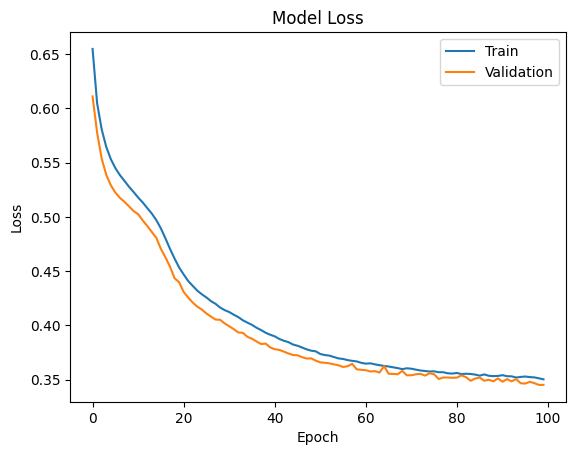

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


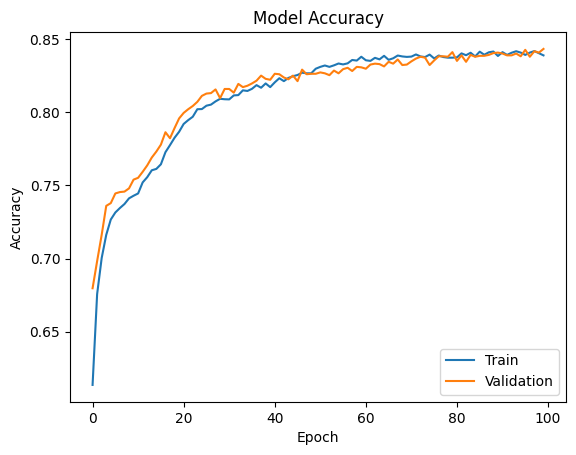

In [17]:
 # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [18]:
# Assuming 'X_test_scale' and 'y_test' are your test data and labels
test_loss, test_accuracy = ann.evaluate(X_test_scale, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


63/63 [==============================] - 0s 505us/step - loss: 0.3935 - accuracy: 0.8405
Test Loss: 0.3935045003890991
Test Accuracy: 0.840499997138977


In [19]:
ann.save('churn_prediction_model.h5')

/Users/manishrawat/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predicting the result of a single observation

To predict if the customer with the following informations will leave the bank:

1. Geography: France
2. Credit Score: 600
3. Gender: Male
4. Age: 40 years old
5. Tenure: 3 years
6. Balance: \$ 60000
7. Number of Products: 2
8. Does have a credit card? Yes
9. Active Member: Yes
10. Estimated Salary: \$ 50000

So, should we say goodbye to that customer? Yes/No?

Note: As we have label encoded the category Geography & Gender
1. Geography

   a. Spain: 0 0 1

   b. Germany: 0 1 0

   c. France: 1 0 0

2. Gender
   
   a. Male: 1

   b. Female: 0

In [20]:

predictor = ann.predict(sc.transform([[1, 0, 0, 699, 1, 34, 4, 185173.81, 2, 1, 0, 120834.48]]))

# predictor = ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))

print('------------------------------------------------------------------')

if predictor > 0.5:
  print('Results: Customer will Churn!')
else: print('Results: Customer will not Churn, this is a Happy Customer!')

print('------------------------------------------------------------------')

1/1 [==============================] - 0s 40ms/step
------------------------------------------------------------------
Results: Customer will not Churn, this is a Happy Customer!
------------------------------------------------------------------
